**LIBRARIES**

In [1]:
from ipywidgets import interact, fixed

import matplotlib.pyplot as plt
import cv2
import numpy as np

**INPUT IMAGE**

In [2]:
f = cv2.imread('rubik.jpg',0)

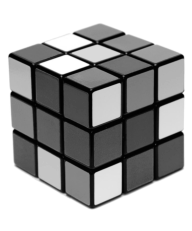

In [3]:
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

**GAUSSIAN FILTER**

In [9]:
# create a Gaussian filter, input image f and parameter D0
def filterGaussian(f, D0):
    
    # convert image into frequency domain
    F = np.fft.fft2(f)
    Fshift = np.fft.fftshift(F)

    # Gaussian filter (low pass)
    M,N = f.shape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))

    # Apply the filter
    Gshift = Fshift * H
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    
    # plot the filter and filtered image
    fig, ax = plt.subplots(dpi=150, ncols=2, nrows=1, figsize=(6,4))
    
    ax[0].set_title(f'Gaussian Filter D0: {D0}')
    ax[0].imshow(H, cmap='gray')
    ax[0].axis('off')
    
    ax[1].set_title('Filtered Image')
    ax[1].imshow(g, cmap='gray')
    ax[1].axis('off')
    
    plt.show()

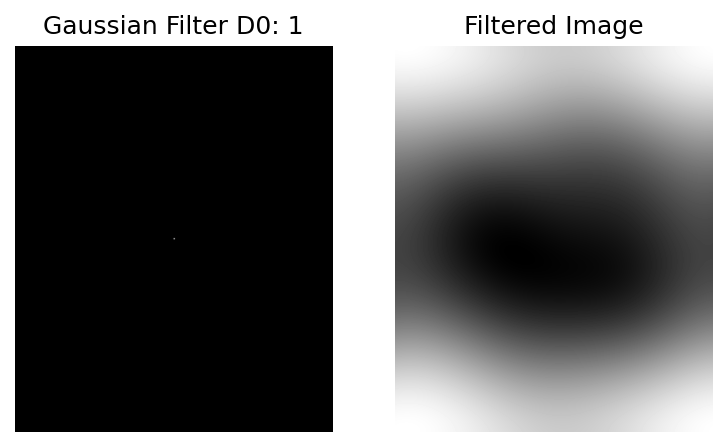

In [14]:
filterGaussian(f, 1)

**INTERACTIVE SLIDER WIDGET**

In [15]:
interact(filterGaussian, f=fixed(f), D0=(1,100,1));

interactive(children=(IntSlider(value=50, description='D0', min=1), Output()), _dom_classes=('widget-interact'…

**LOW PASS AND HIGH PASS FILTER**

In [16]:
def filterGaussian(f, D0, lowpass=True):
    # convert image into frequency domain
    F = np.fft.fft2(f)
    Fshift = np.fft.fftshift(F)

    # create Gaussian filter (low pass filter)
    M,N = f.shape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))

    if lowpass==True:                 # low pass filter
        Gshift = Fshift * H
        G = np.fft.ifftshift(Gshift)
        g = np.abs(np.fft.ifft2(G))
    else:                             # high pass filter
        H = 1 - H
        Gshift = Fshift * H
        G = np.fft.ifftshift(Gshift)
        g = np.abs(np.fft.ifft2(G))

    # plot the filter and filtered image
    fig, ax = plt.subplots(dpi=150, ncols=2, nrows=1, figsize=(6,4))

    ax[0].set_title(f'Gaussian Filter D0: {D0}')     # display the filter
    ax[0].imshow(H, cmap='gray')
    ax[0].axis('off')

    ax[1].set_title('Filtered Image')                # display the result
    ax[1].imshow(g, cmap='gray')
    ax[1].axis('off')
    
    plt.show()

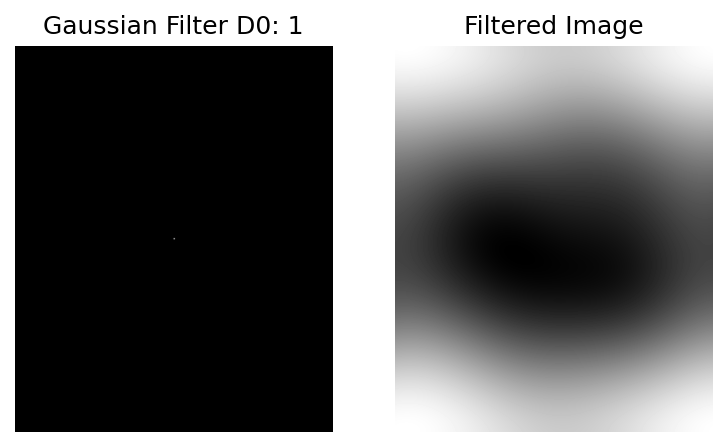

In [17]:
filterGaussian(f, 1, lowpass=True)

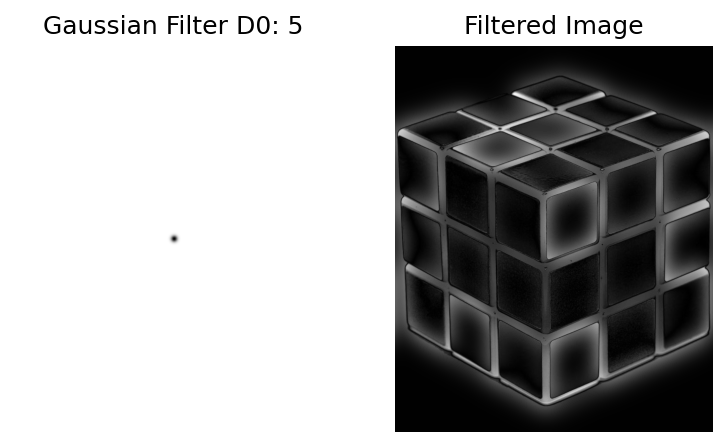

In [18]:
filterGaussian(f, 5, lowpass=False)

In [19]:
interact(filterGaussian, f=fixed(f), D0=(1,10,1), lowpass=True);

interactive(children=(IntSlider(value=5, description='D0', max=10, min=1), Checkbox(value=True, description='l…

**THANK YOU**